<a href="https://colab.research.google.com/github/LeMat11/ME5920/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9.91M/9.91M [00:00<00:00, 125MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 43.2MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 90.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.85MB/s]


Subset size: 1000
One sample shape: torch.Size([1, 28, 28]) label: 9


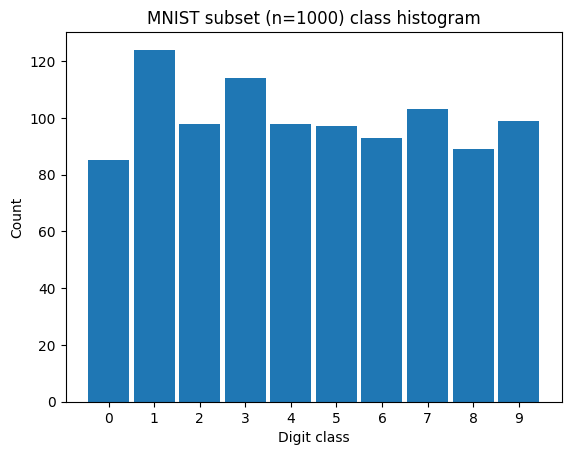

Batched images shape: torch.Size([40, 25, 1, 28, 28])
Batched labels shape: torch.Size([40, 25])


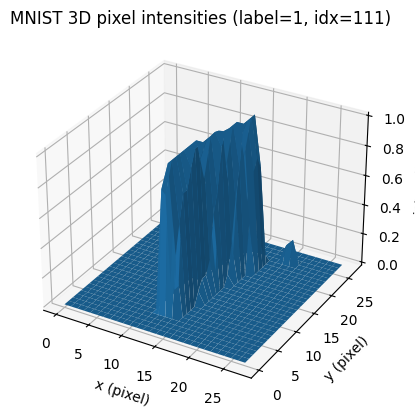

In [1]:
# 2.1 MNIST Images
# If needed (Colab): !pip -q install einops

import torch
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from einops import rearrange
import numpy as np

# ----------------------------
# 1) Download MNIST + subset of 1000
# ----------------------------
transform = transforms.ToTensor()  # returns tensor in [0,1], shape [1,28,28]

mnist_train = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

# Make a deterministic subset of 1000 samples (optional but nice for reproducibility)
torch.manual_seed(0)
indices = torch.randperm(len(mnist_train))[:1000].tolist()
mnist_subset = Subset(mnist_train, indices)

print("Subset size:", len(mnist_subset))
x0, y0 = mnist_subset[0]
print("One sample shape:", x0.shape, "label:", y0)  # should be torch.Size([1,28,28])

# ----------------------------
# 2) Plot histogram of classes in subset
# ----------------------------
labels = [mnist_subset[i][1] for i in range(len(mnist_subset))]
plt.figure()
plt.hist(labels, bins=np.arange(11)-0.5, rwidth=0.9)
plt.xticks(range(10))
plt.xlabel("Digit class")
plt.ylabel("Count")
plt.title("MNIST subset (n=1000) class histogram")
plt.show()

# ----------------------------
# 3) Batch images into groups of 25 using einops
#    Required shape: [1000,28,28] -> [num_batches, 25, 1, 28, 28]
# ----------------------------
# Stack subset into a single tensor
images = torch.stack([mnist_subset[i][0] for i in range(len(mnist_subset))])  # [1000,1,28,28]
labels_t = torch.tensor(labels)  # [1000]

# If you want the intermediate [1000,28,28] (as in prompt), squeeze channel then reshape back
images_1000_28_28 = images.squeeze(1)  # [1000,28,28]

# Make sure 1000 is divisible by 25
batch_size = 25
assert images_1000_28_28.shape[0] % batch_size == 0

# Rearrange to [num_batches, batch_size, 1, 28, 28]
batches = rearrange(images_1000_28_28, '(nb bs) h w -> nb bs 1 h w', bs=batch_size)
label_batches = rearrange(labels_t, '(nb bs) -> nb bs', bs=batch_size)

print("Batched images shape:", batches.shape)       # [40,25,1,28,28]
print("Batched labels shape:", label_batches.shape) # [40,25]

# ----------------------------
# 4) Randomly select an image and plot it in 3D
# ----------------------------
import random
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

idx = random.randint(0, len(mnist_subset)-1)
img, lab = mnist_subset[idx]  # img: [1,28,28]
img2d = img.squeeze(0).numpy()  # [28,28]

# Create x,y grid
x = np.arange(28)
y = np.arange(28)
X, Y = np.meshgrid(x, y)
Z = img2d  # pixel intensity

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)  # don't set colors per your default plotting preference
ax.set_xlabel("x (pixel)")
ax.set_ylabel("y (pixel)")
ax.set_zlabel("intensity")
ax.set_title(f"MNIST 3D pixel intensities (label={lab}, idx={idx})")
plt.show()